### Load packages

In [52]:
library(tidyverse)
library(ggthemes)
library(lme4)
library(lmerTest)
library(brms)
library(broom.mixed)
library(tidyboot)

In [53]:
d = read_csv('../results/csv/summary/human_accuracy_by_scenario.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  agent = col_character(),
  scenario = col_character(),
  obs_mean = col_double(),
  boot_mean = col_double(),
  ci_lb = col_double(),
  ci_ub = col_double(),
  pct_2.5 = col_double(),
  pct_97.5 = col_double()
)




In [54]:
d <- d %>% arrange(obs_mean)
d

agent,scenario,obs_mean,boot_mean,ci_lb,ci_ub,pct_2.5,pct_97.5
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
human,linking,0.6431818,0.6432339,0.6319678,0.6545455,0.5368333,0.7443333
human,clothiness,0.6781333,0.6782222,0.6637289,0.6922689,0.5436667,0.7716667
human,dominoes,0.6927907,0.6926998,0.6843411,0.7011628,0.6141667,0.7600000
human,drop,0.7436559,0.7437218,0.7354104,0.7513262,0.6666667,0.8046667
human,towers,0.7631373,0.7630115,0.7549745,0.7709824,0.6693333,0.8260000
human,containment,0.7674897,0.7675353,0.7589259,0.7768724,0.6866667,0.8400000
human,collision,0.8073333,0.8072727,0.7974796,0.8169630,0.7030000,0.8800000
human,rollingsliding,0.8833684,0.8834636,0.8750860,0.8916509,0.7890000,0.9400000


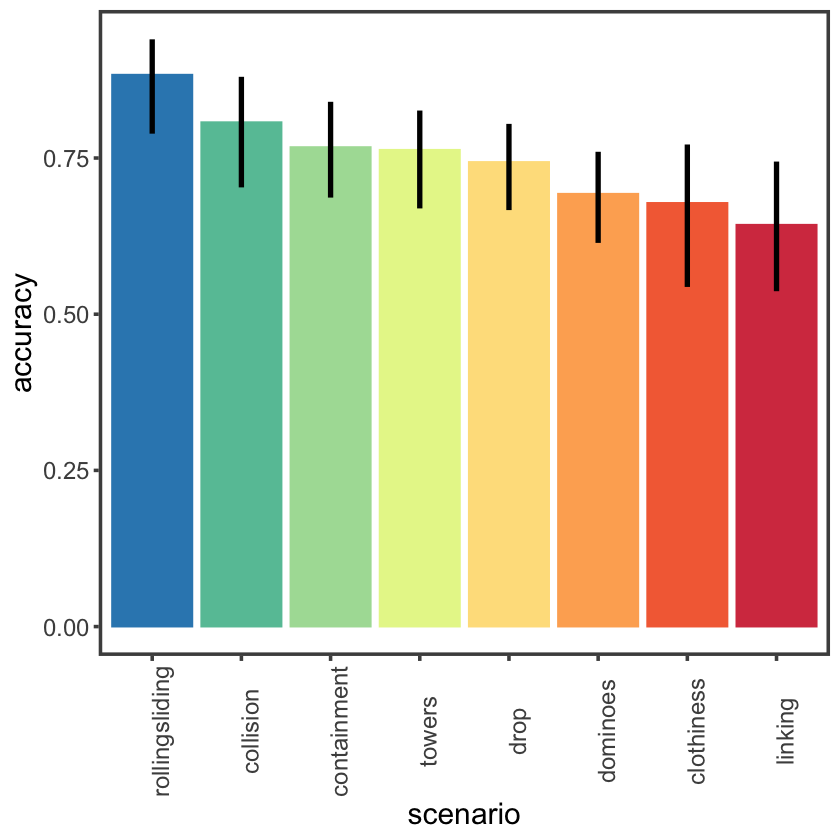

In [57]:
## accuracy bar plot with 2.5 and 97.5 percentile marked (THESE ARE NOT CONFIDENCE INTERVALS)
d$scenario <- factor(d$scenario,levels = d$scenario)
d %>%
  ggplot(aes(x=reorder(scenario,-obs_mean), y=obs_mean, color=scenario, fill=scenario)) +
  geom_bar(stat='identity') +
  geom_errorbar(aes(ymin=pct_2.5, ymax = pct_97.5), width = 0, size = 1.5, color='black') + 
    theme_few() +
    xlab('scenario') +
    ylab('accuracy') +
    theme(text = element_text(size=18), 
          element_line(size=1), 
          element_rect(size=2, color="#00000"),
          axis.text.x = element_text(angle=90)) +
    theme(legend.position = "none") +
    scale_fill_brewer(palette="Spectral") + scale_color_brewer(palette="Spectral")

ggsave('../results/plots/human_accuracy_across_scenarios.pdf', width=12, height = 18, units='cm')

In [ ]:
## TODO: add model bars

In [ ]:
## TODO: human-model correlation

In [58]:
## TODO: human-model kappa